In [1]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
sns.color_palette("RdBu", n_colors=7)
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent):
    total_rows = df.shape[0]
    plt.figure(figsize=(16,8))
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.2f} %'.format(percent), ha='center')
    
def show_unique(column, df):
    
    print "There are {} unique values in column {}\n".format(str(len(df[column].unique())), column)
    
def stacked_chart(df, x, legend, title=None, barmode='stack', xaxistitle=None, yaxistitle=None):
    
    title = " " if title is None else title
    xaxistitle = " " if xaxistitle is None else xaxistitle
    yaxistitle = " " if yaxistitle is None else yaxistitle
    
    ct = pd.crosstab(index=df[x], columns=df[legend], normalize='index').rename_axis(None, axis=1).reset_index()
    legend_list = ct.columns[1:]
    
    #data for chart
    data = [Bar(x=ct[x], y=ct[col], name=str(col)) for col in legend_list]
    layout = Layout(title=title, barmode=barmode,
                   xaxis=dict(title=xaxistitle,showticklabels=True, type='category'),
                yaxis=dict(title=yaxistitle))
    
    fig = Figure(data=data, layout=layout)
    
    return fig

## stacked graphs

In [3]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

Data shape:
151158 Rows x 17 Columns


,caseid,state,age,airbag,injury,restraint,sex,inimpact,modelyr,airbagAvail,airbagDeploy,Restraint,D_injury,D_airbagAvail,D_airbagDeploy,D_Restraint,year
0,1:1:2,1,20,30,3,1,2,12,1991,no,no,yes,3,no,no,yes,1998
1,1:2:1,1,41,30,2,0,1,2,1987,no,no,no,2,no,no,no,1998
2,1:3:1,1,26,30,3,0,1,4,1983,no,no,no,4,no,no,no,1998
3,1:8:1,1,17,1,4,0,1,11,1997,yes,yes,no,4,yes,yes,no,1998
4,1:10:1,1,19,30,3,0,1,12,1998,no,no,no,4,yes,yes,no,1998
5,1:13:1,1,1,30,4,4,1,3,1991,no,no,yes,3,no,no,yes,1998
6,1:15:1,1,24,1,3,0,1,2,1995,yes,yes,no,3,yes,yes,yes,1998
7,1:19:2,1,50,30,4,3,2,3,1984,no,no,yes,3,no,no,yes,1998
8,1:21:1,1,16,30,4,3,2,12,1991,no,no,yes,3,yes,yes,yes,1998
9,1:23:1,1,53,30,4,0,1,3,1988,no,no,no,4,no,no,no,1998


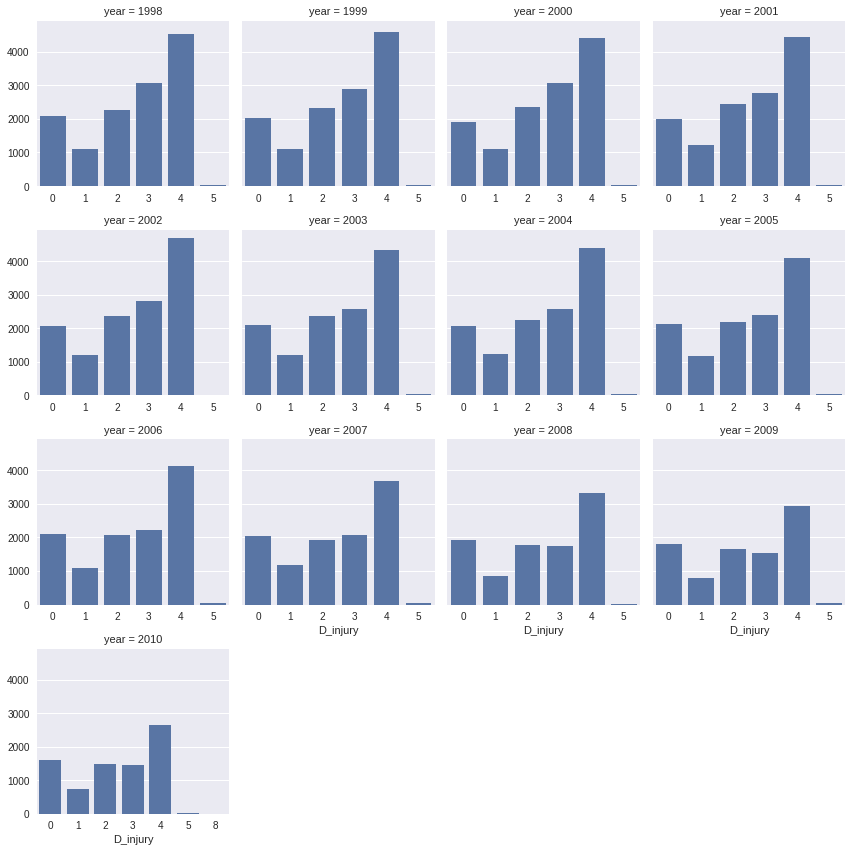

In [4]:
g = sns.FacetGrid(data, col="year", col_wrap=4, sharex=False)
g = g.map(sns.countplot, 'D_injury')

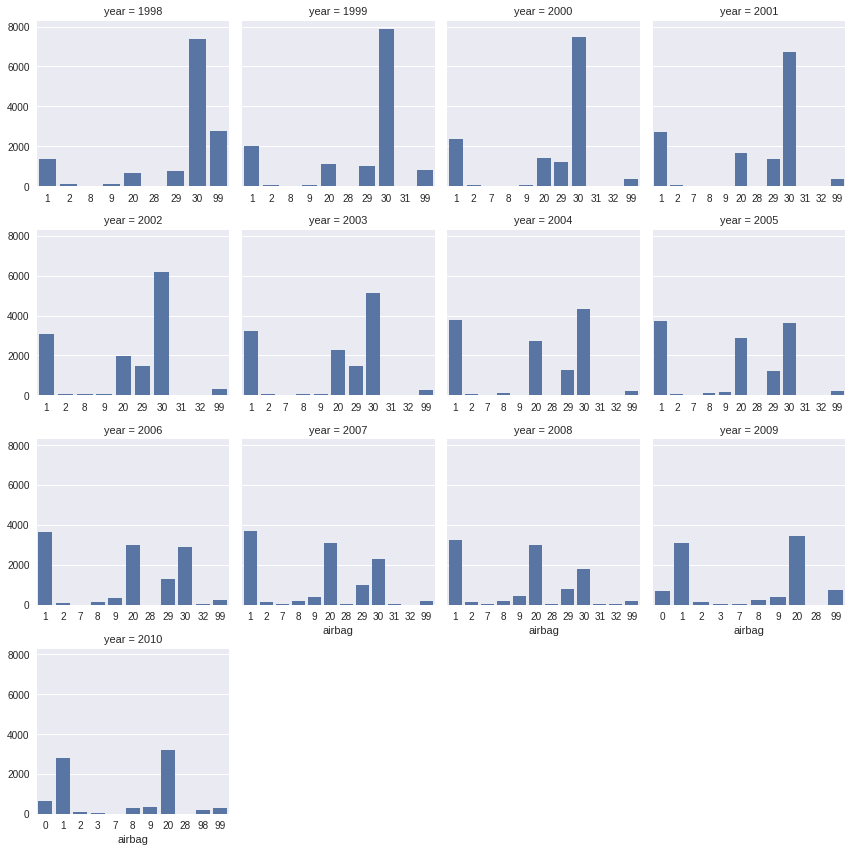

In [5]:
g = sns.FacetGrid(data, col="year", col_wrap=4, sharex=False)
g = g.map(sns.countplot, 'airbag')

### stacked bar graph type 30 vs all

In [6]:
#lazy, need to find an optimized way to do this.
airbag_df = data[['airbag', 'year']]
airbag_df.loc[airbag_df.airbag != 30, 'airbag'] = 'other'

In [7]:
airbag_df.head()

,airbag,year
0,30,1998
1,30,1998
2,30,1998
3,other,1998
4,30,1998


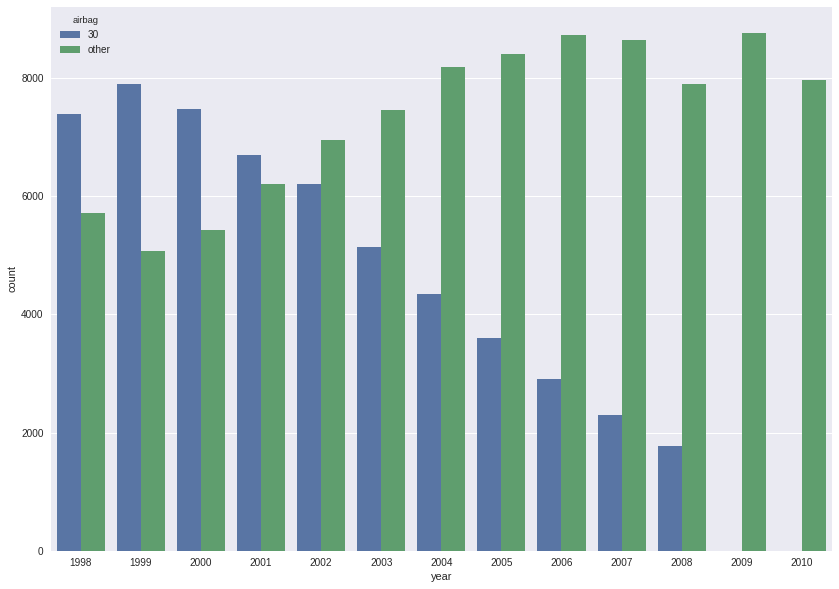

In [8]:
plt.figure(figsize = (14,10))
ax = sns.countplot(x='year', hue='airbag', data=airbag_df)
total_rows = airbag_df.shape[0]

### Fatal Injuries in  states

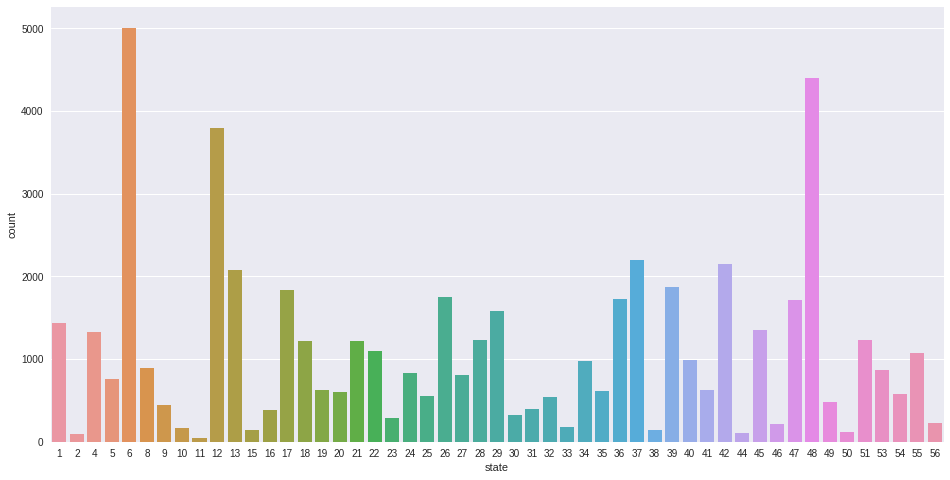

In [9]:
#states with a;; passangers deaths
fatalp_states = data[(data.injury == 4)]
count_plot('state', 'x', fatalp_states, 'notshow')

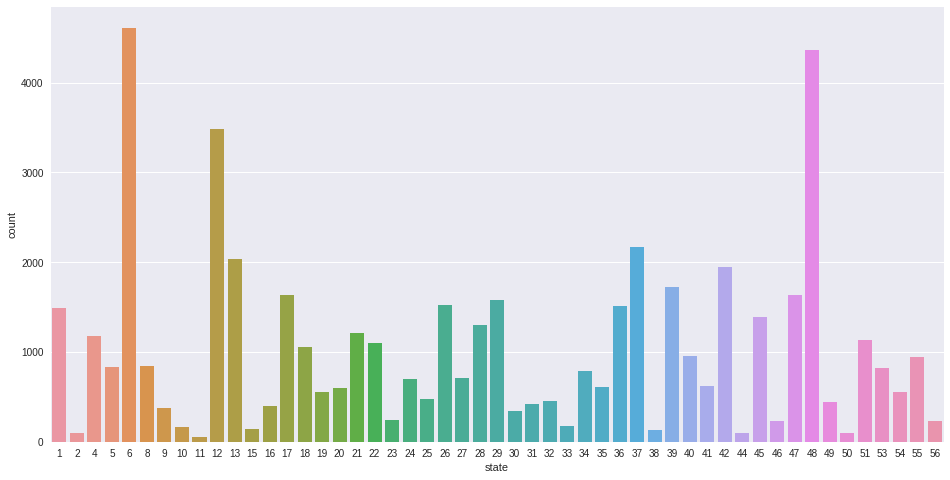

In [10]:
#states with driver deaths
fatald_states = data[(data.D_injury == 4)]
count_plot('state', 'x', fatald_states, 'notshow')

In [11]:
#g = sns.FacetGrid(fatald_states, col="state", col_wrap=4, sharex=False)
#g = g.map(sns.countplot, 'D_injury')

### Injury over years 

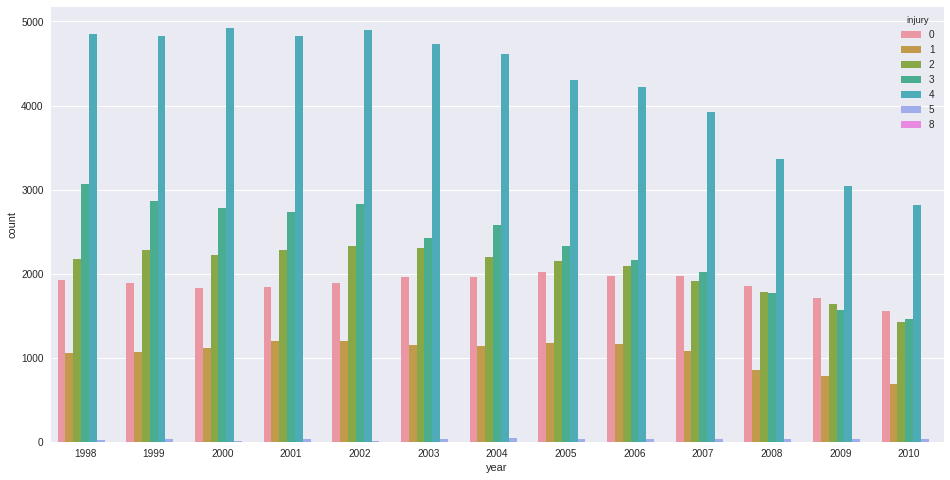

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x='year', hue='injury', data=data)

In [13]:
#stacked chart for passengers death
#todo

In [14]:
#injury vs others
injuryother = data[['year', 'injury']]
injuryother.loc[injuryother.injury != 4, 'injury'] = 'other'
injuryother.head()

,year,injury
0,1998,other
1,1998,other
2,1998,other
3,1998,4
4,1998,other


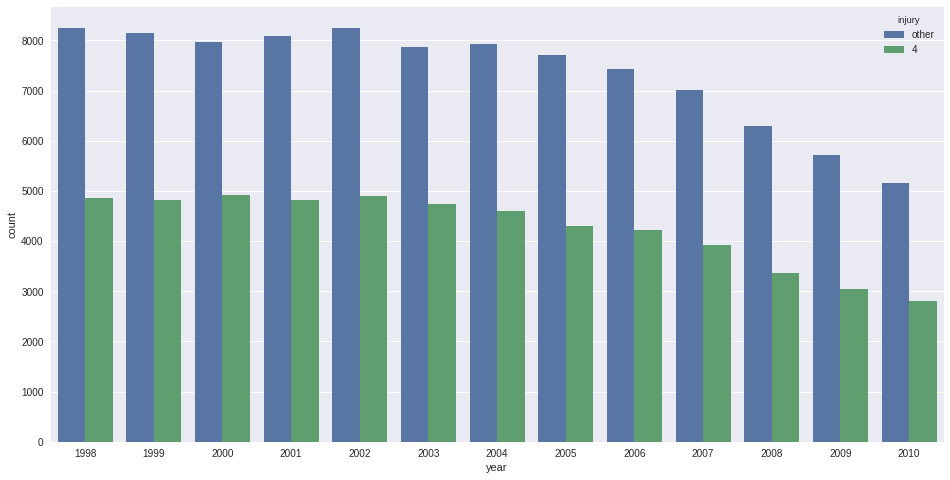

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x='year', hue='injury', data=injuryother)

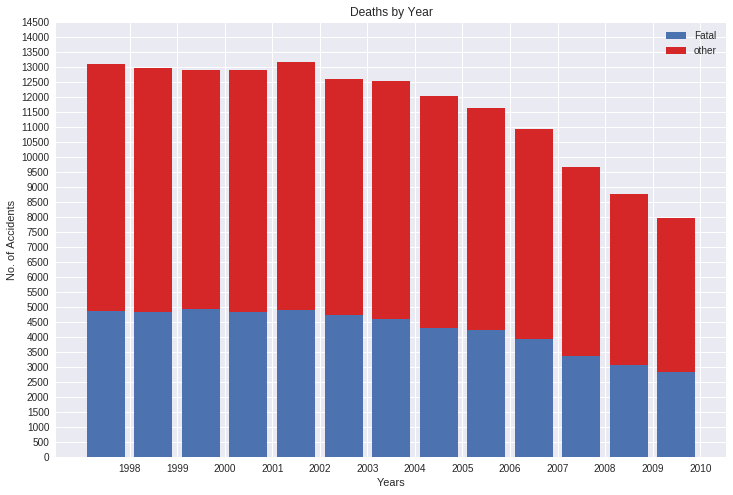

In [16]:
plt.figure(figsize=(12,8))
#stacked
fataldf = injuryother[injuryother.injury == 4]
otherdf = injuryother[injuryother.injury == 'other']
years = data.year.unique()
fatal = []
other = []
#for fatal
for year in years:
    total = len(fataldf[fataldf.year == year])
    fatal.append(total)

#for other
for year in years:
    total = len(otherdf[otherdf.year == year])
    other.append(total)

#arange x locations for years
ind = np.arange(len(years))

width = 1       # the width of the bars: can also be len(x) sequence

#positions for xticks
xticks_pos = [i+(width/2) for i in ind]

p1 = plt.bar(ind, fatal)
p2 = plt.bar(ind, other, bottom=fatal, color='#d62728')

plt.ylabel('No. of Accidents')
plt.xlabel('Years')
plt.title('Deaths by Year')

plt.xticks(xticks_pos, years)
plt.yticks(np.arange(0, 15000, 500))
plt.legend((p1[0], p2[0]), ('Fatal', 'other'), loc=0)
plt.show()

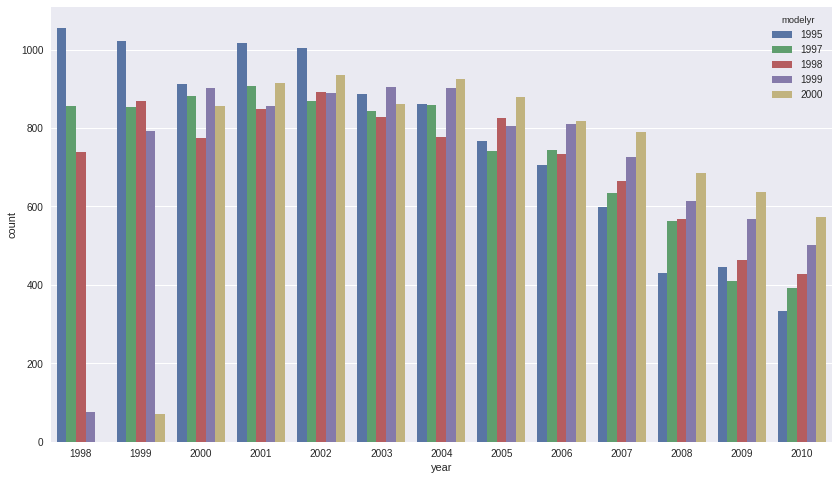

In [17]:
# lets see which years cars models were usesd most finding top 10
modeldf = data[['airbag', 'modelyr','inimpact', 'year', 'injury', 'airbagAvail','airbagDeploy','D_injury', 'D_airbagAvail', 'D_airbagDeploy']]
topmodels = list(modeldf.modelyr.value_counts().keys()[0:5])
modeldf = modeldf[modeldf.modelyr.isin(topmodels)]
plt.figure(figsize=(14,8))
sns.countplot(x='year', hue='modelyr', data=modeldf)

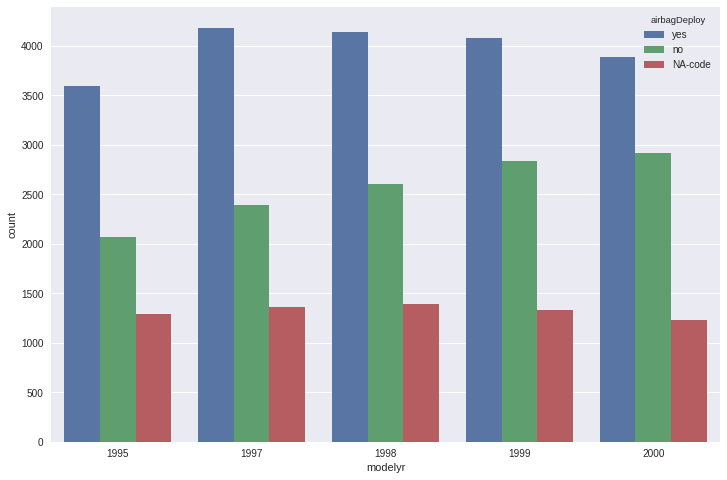

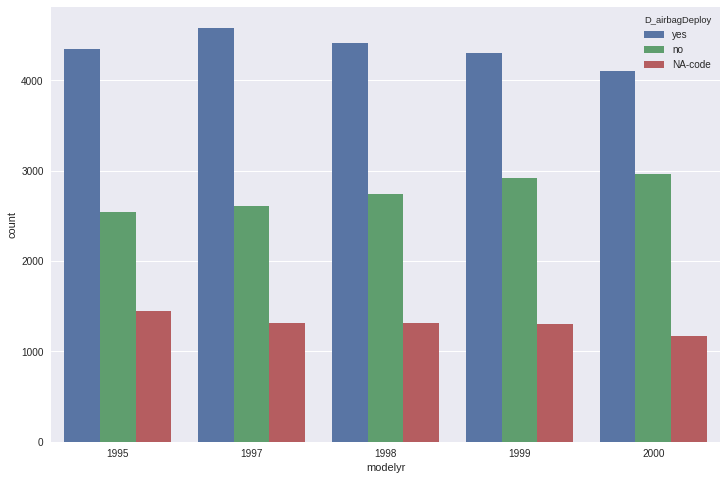

In [18]:
bagavail = modeldf[modeldf.airbagAvail == 'yes']

plt.figure(figsize=(12,8))
sns.countplot(x='modelyr', hue='airbagDeploy', data=bagavail)

bagavail = modeldf[modeldf.D_airbagAvail == 'yes']

plt.figure(figsize=(12,8))
sns.countplot(x='modelyr', hue='D_airbagDeploy', data=bagavail)

In [19]:
#lets dig deeper in what car models inimpacats airbag was not deployed for passenger
#but first lets generalize impacts types to top front, back, left, right
driverside = [7,8,9,10,11,62,63,61]
passengerside = [1,2,3,4,5,82,83,81]
modeldf.loc[modeldf.inimpact.isin(driverside), 'inimpact'] = 'D_Side'
modeldf.loc[modeldf.inimpact.isin(passengerside), 'inimpact'] = 'P_Side'
modeldf.D_injury.unique()

array([4, 3, 0, 2, 1, 5])

In [20]:
#inimpacts distribution in top 5 car models
#sns.countplot(x='inimpact', hue='modelyr', data=modeldf)

In [21]:
#fatal injuries of driver and passengers on different inimpacts
#impact of passenger side collision on driver and passenger
plt.figure(figsize=(14,8))
#cluster graph
#sns.countplot(x='inimpact', hue='D_injury', data=modeldf)
#seems like more drivers have died when car was hit on driver side and vice versa which is normal.
ct = pd.crosstab(modeldf['inimpact'], modeldf['D_injury'], normalize='index').rename_axis(None, axis=1).reset_index()
#ct['inimpact'] = ct.inimpact.astype('category')
ct

,inimpact,0,1,2,3,4,5
0,0,0.04,0.07,0.21,0.22,0.45,0.00
1,6,0.28,0.16,0.19,0.17,0.21,0.00
2,12,0.21,0.10,0.19,0.21,0.28,0.00
3,13,0.10,0.04,0.16,0.23,0.47,0.00
4,14,0.25,0.05,0.16,0.17,0.37,0.00
5,18,0.50,0.03,0.12,0.09,0.26,0.00
6,98,0.00,0.18,0.36,0.09,0.36,0.00
7,99,0.11,0.07,0.20,0.21,0.40,0.00
8,D_Side,0.15,0.07,0.12,0.14,0.53,0.00
9,P_Side,0.15,0.11,0.23,0.26,0.26,0.00


In [22]:
#todo: stacak above
#dig into states data and see deaths behavior over the years in top states

### Stacked graph using plotly

In [23]:
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly.graph_objs import *
init_notebook_mode(connected=True)         # initiate notebook for offline plot


In [24]:
data = [
    Bar(x=ct['inimpact'], y=ct[0], name='0'),
    Bar(x=ct['inimpact'], y=ct[1], name='1'),
    Bar(x=ct['inimpact'], y=ct[2], name='2'),
    Bar(x=ct['inimpact'], y=ct[3], name='3'),
    Bar(x=ct['inimpact'], y=ct[4], name='4'),
    Bar(x=ct['inimpact'], y=ct[5], name='5')
        ]
layout = Layout(title="Accidents By Initial Impact",
                barmode='stack',
                xaxis=dict(title='Year',showticklabels=True, type='category'),
                yaxis=dict(title='Injury Count'))
fig = Figure(data=data, layout=layout)

iplot(fig)

In [25]:
#todo: add percentages in bars, sliders, timeseries plots, state wise death behavior over years show in grid if possible

# Let's see injury trend in top 5 states 

In [26]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
injury_df = data[['year', 'state', 'injury']]
top5states = injury_df.state.value_counts().keys()[0:5]
top5states_df = injury_df[injury_df.state.isin(top5states)]
top5states_df.state.unique()

array([ 6, 12, 13, 37, 48])

### State 6 injury trend over years

In [27]:
state6_df = top5states_df[top5states_df.state == 6]
state12_df = top5states_df[top5states_df.state == 12]
state13_df = top5states_df[top5states_df.state == 13]
state37_df = top5states_df[top5states_df.state == 37]
state48_df = top5states_df[top5states_df.state == 48]


In [28]:
fig = stacked_chart(df=state6_df, x='year', legend='injury', xaxistitle='Year', yaxistitle='Injury Count', title='Injury Count by year in State 6')
iplot(fig)

fig = stacked_chart(df=state12_df, x='year', legend='injury', xaxistitle='Year', yaxistitle='Injury Count', title='Injury Count by year in State 12')
iplot(fig)

fig = stacked_chart(df=state13_df, x='year', legend='injury', xaxistitle='Year', yaxistitle='Injury Count', title='Injury Count by year in State 13')
iplot(fig)

fig = stacked_chart(df=state37_df, x='year', legend='injury', xaxistitle='Year', yaxistitle='Injury Count', title='Injury Count by year in State 37')
iplot(fig)

fig = stacked_chart(df=state48_df, x='year', legend='injury', xaxistitle='Year', yaxistitle='Injury Count', title='Injury Count by year in State 48')
iplot(fig)

In [29]:
#lets break down seat belts and airbag state by state